In [70]:
import sklearn


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
import pandas as pd
import matplotlib.pyplot as plt


In [72]:
samples= pd.read_csv('dataset/2.DatasetLabeling_NomorUrut_clean_content_textblobvader.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]
samples.shape

(7306, 20)

In [73]:
print("Jumlah Konten unik:",int(len(samples['clean_content'].unique())))
# samples['clean_content'].unique()

Jumlah Konten unik: 3307


In [74]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           7306 non-null   object 
 1   clean_content                  7306 non-null   object 
 2   likes                          7306 non-null   int64  
 3   replies                        7306 non-null   int64  
 4   quotes                         7306 non-null   int64  
 5   retweets                       7306 non-null   int64  
 6   searchQuery                    7306 non-null   object 
 7   user_location                  3472 non-null   object 
 8   tanggal                        7306 non-null   object 
 9   dataset                        7306 non-null   object 
 10  date                           7306 non-null   object 
 11  textblob_sentiment             7306 non-null   object 
 12  textblob_sentiment_assessment  7306 non-null   o

### Remove Duplication Clean Content

In [75]:
samples.drop_duplicates(subset=['clean_content'], inplace=True,keep='last')
# print(samples)

In [76]:
len(samples)

3307

### Remove #Nomor #Paslon Paslon #nomorurut

In [77]:
# samples = samples.drop(samples[(samples.searchQuery=='nomor urut') | (samples.searchQuery=='#paslon')  | (samples.searchQuery=='paslon')  | (samples.searchQuery=='#nomor')].index)

In [78]:
print("Jumlah Konten unik:",int(len(samples['clean_content'].unique())))
# samples.shape

Jumlah Konten unik: 3307


In [79]:
# len(samples['clean_content'].unique())
jquery=("Jumlah Query unik:",str(len(samples['searchQuery'].unique())))
jqueryunique=samples['searchQuery'].unique()
with open('hasil/5.stats-query-unik_'+str((len(samples)))+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(jquery))
    f.writelines(''.join('\n'))
    f.writelines(''.join(jqueryunique))

## Define Date Timestamp

In [80]:
from datetime import datetime
import pytz


now = datetime.now() # current date and time

tz = pytz.timezone('Asia/Jakarta')
aware_obj = tz.localize(now)
d = aware_obj.strftime("%d%m%Y")
print(d,now,aware_obj.tzinfo)

01122023 2023-12-01 21:28:01.262099 Asia/Jakarta


## Setup Data Sampling

In [81]:
totaldata=str(len(samples))
print(totaldata)

3307


In [82]:
print(samples['dataset'].value_counts().reindex(['prabowogibran','aniesmuhaimin','ganjarmahfud'], fill_value=0))

dataset
prabowogibran     248
aniesmuhaimin     987
ganjarmahfud     2072
Name: count, dtype: int64


In [83]:
print(samples['searchQuery'].value_counts().reindex(['nomor urut','#nomor','paslon'], fill_value=0))

searchQuery
nomor urut    545
#nomor          5
paslon        747
Name: count, dtype: int64


In [84]:
# dfx=pd.DataFrame(samples['searchQuery'].value_/counts().reindex(samples['searchQuery'], fill_value=0))

In [85]:
# dfx

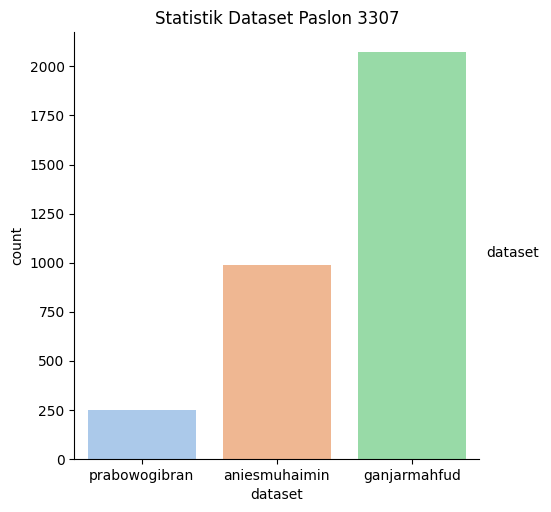

In [86]:
import seaborn as sns
sns.catplot(data=samples, x="dataset", kind="count",hue="dataset",palette="pastel")
plt.title('Statistik Dataset Paslon '+str(totaldata))
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'.png')


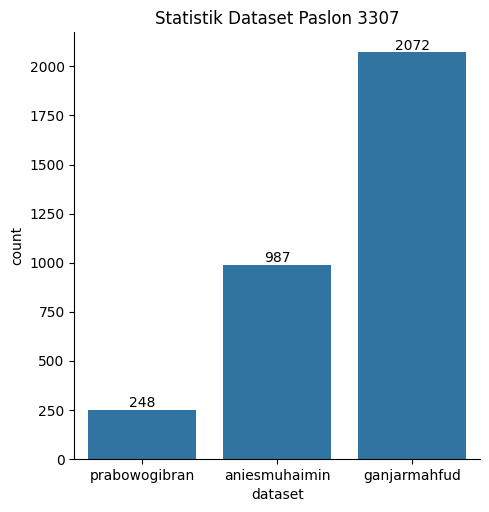

In [87]:
grid = sns.catplot(x='dataset', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.title('Statistik Dataset Paslon '+str(totaldata))
plt.savefig('hasil/5.statistik_dataset_nowarna_'+totaldata+'.png')

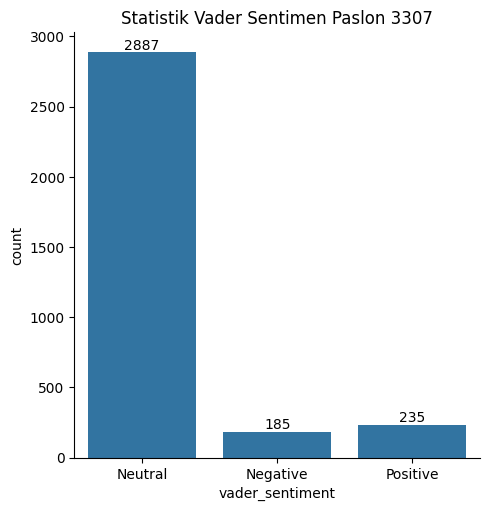

In [88]:
grid = sns.catplot(x='vader_sentiment', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.title('Statistik Vader Sentimen Paslon '+str(totaldata))
plt.savefig('hasil/5.statistik_dataset_vader_sentiment_'+totaldata+'.png')

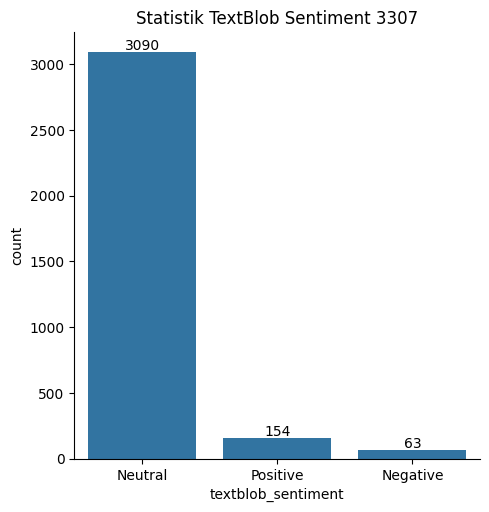

In [89]:
grid = sns.catplot(x='textblob_sentiment', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.title('Statistik TextBlob Sentiment '+str(totaldata))
plt.savefig('hasil/5.statistik_dataset_textblob_sentiment_'+totaldata+'.png')

In [90]:
from collections import Counter
searchQuery = list(set(samples['searchQuery']))
c = Counter(samples['searchQuery'])
counts = []
for i in searchQuery:
    counts.append((i, c[i]))
                  
df_stats = pd.DataFrame(counts, columns=['searchQuery', 'number_of_query'])
df_stats

,searchQuery,number_of_query
0,nomor urut,545
1,#mahfudmd,521
2,#ganjarpranowo,9
3,#muhaimin,5
4,#aniescakimin,21
5,#ganjarpresiden,13
6,#gibran,10
7,#aniespresiden,9
8,#prabowo2024,3
9,#aniesmuhaimin,203


Text(0.5, 0, 'searchQuery')

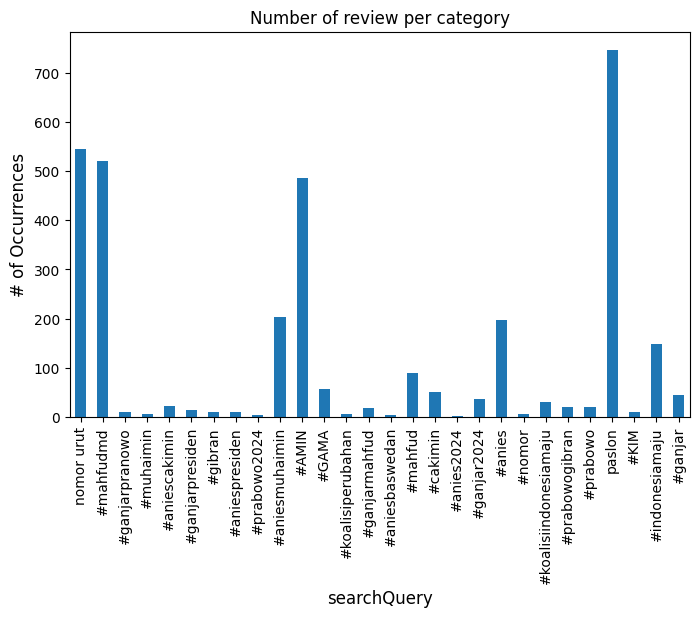

In [91]:
df_stats.plot(x='searchQuery', y='number_of_query', kind='bar', legend=False, grid=False, figsize=(8, 5))
plt.title("Number of review per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('searchQuery', fontsize=12)

In [92]:
# dataset1=samples.query("dataset=='prabowogibran' and vader_sentiment=='Negative'").sample(10)
dataset1=samples.query("dataset=='prabowogibran'")#.sample(10)
dataset2=samples.query("dataset=='aniesmuhaimin'")#.sample(10)
dataset3=samples.query("dataset=='ganjarmahfud'")#.sample(10)

In [93]:
dataset1.head()

,text,clean_content,likes,replies,quotes,retweets,searchQuery,user_location,tanggal,dataset,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
2,Pak Prabowo mengangkat anak penerbang tucano y...,prabowo angkat anak terbang tucano gugur anak ...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
3,"Unboxing Prabowo; Cerita sejarah, deklarasi bu...",unboxing prabowo cerita sejarah deklarasi budi...,1,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
7,"Pakar Intelijen AM Hendropriyono, Jika Tidak A...",pakar intelijen am hendropriyono halang rintan...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
8,Yang Orang tidak tahu tentang Pak Prabowo \n #...,orang prabowo indonesiaterusmaju energibaru se...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
9,Pak Prabowo Subianto kembali meresmikan 15 tit...,prabowo subianto resmi titik sumber air bersih...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral


In [94]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2 to 1815
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           248 non-null    object 
 1   clean_content                  248 non-null    object 
 2   likes                          248 non-null    int64  
 3   replies                        248 non-null    int64  
 4   quotes                         248 non-null    int64  
 5   retweets                       248 non-null    int64  
 6   searchQuery                    248 non-null    object 
 7   user_location                  138 non-null    object 
 8   tanggal                        248 non-null    object 
 9   dataset                        248 non-null    object 
 10  date                           248 non-null    object 
 11  textblob_sentiment             248 non-null    object 
 12  textblob_sentiment_assessment  248 non-null    object 

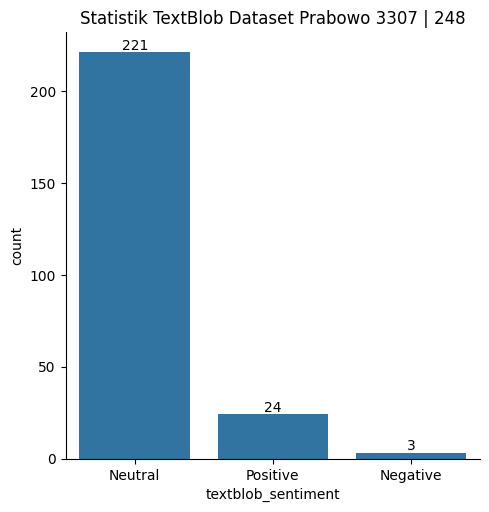

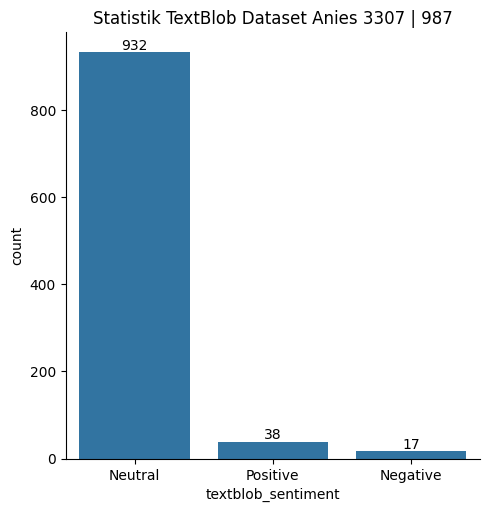

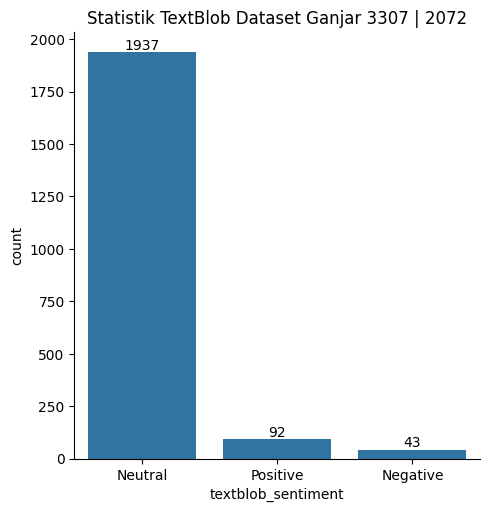

In [95]:
# grid = sns.catplot(x='textblob_sentiment', kind='count', data=dataset1)
prabowo1=sns.catplot(data=dataset1, x="textblob_sentiment", kind="count")#,hue="textblob_sentiment",palette="pastel")
ax = prabowo1.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.title('Statistik TextBlob Dataset Prabowo '+totaldata+' | '+str(len(dataset1)))
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_prabowo_'+str(len(dataset1))+'.png')

anies1=sns.catplot(data=dataset2, x="textblob_sentiment", kind="count")#,hue="textblob_sentiment",palette="pastel")
ax1 = anies1.axes[0, 0]
ax1.bar_label(ax1.containers[0])
plt.title('Statistik TextBlob Dataset Anies '+totaldata+' | '+str(len(dataset2)))
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_anies_'+str(len(dataset2))+'.png')

ganjar1=sns.catplot(data=dataset3, x="textblob_sentiment", kind="count")#,hue="textblob_sentiment",palette="pastel")
ax2 = ganjar1.axes[0, 0]
ax2.bar_label(ax2.containers[0])
plt.title('Statistik TextBlob Dataset Ganjar '+totaldata+' | '+str(len(dataset3)))
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_ganjar_'+str(len(dataset3))+'.png')

## WordCloud Dataset

### Build Corpus Wordcloud

In [96]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
stop=set(stopwords.words('indonesian'))
def preprocess_news(df):
    corpus=[]
    # stem=PorterStemmer()
    # lem=WordNetLemmatizer()
    for news in df['clean_content']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        # words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

In [98]:
corpus_prabowo=preprocess_news(dataset1) #buat list corpus prabowo dataset 1
corpus_anies=preprocess_news(dataset2) #buat list corpus prabowo dataset 1
corpus_ganjar=preprocess_news(dataset3) #buat list corpus prabowo dataset 1

In [99]:
print(corpus_anies) 
len(corpus_anies)

[['tim', 'tau', 'ya', 'guys', 'hujat', 'aniesmuhaimin', 'prabowogibran', 'ganjarmahfud', 'senin'], ['selamat', 'pasuk', 'usia', 'muhammadiyah', 'muhammadiyah', 'moga', 'muhammadiyah', 'manfaat', 'bangun', 'budaya', 'martabat', 'bangsa', 'indonesia', 'aniesmuhaimin', 'milad', 'muhammadiyah'], ['cowok', 'captain', 'tim', 'menang', 'anies', 'muhaimin', 'nya', 'perempuan', 'kuliah', 's', 'hawaii', 'amerika', 'anggota', 'dpr', 'keereen', 'aniespresiden', 'aminmennang', 'pks', 'nasdem', 'pkb', 'partaiummat', 'menang', 'legislatif'], ['tokoh', 'nasional', 'kawasan', 'majelis', 'az', 'zikra', 'sentul', 'bogor', 'jawa', 'barat', 'masyaallah', 'adem', 'lihat', 'nu', 'muhammadiyah', 'gnpf', 'ulama', 'aminajadulu', 'amin', 'ijtimaulama', 'aniespresiden', 'pks', 'pkb', 'nasdem', 'ummat', 'masyumi', 'akalsehatantikkn'], ['moga', 'allah', 'menang', 'partai', 'penfusung', 'presiden', 'wakil', 'presiden', 'usung', 'amin', 'aniespresiden', 'aminmenang', 'pks', 'partaiummat', 'plb', 'nasdem', 'masyumi', 

987

In [100]:
from wordcloud import WordCloud

In [101]:
def show_wordcloud(data, judul):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1 
        )
    
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.title(judul,fontsize=13)
    plt.imshow(wordcloud)
    plt.show()
    plt.savefig('hasil/5.'+judul.replace(" ",'')+'_'+str(totaldata)+'.png')

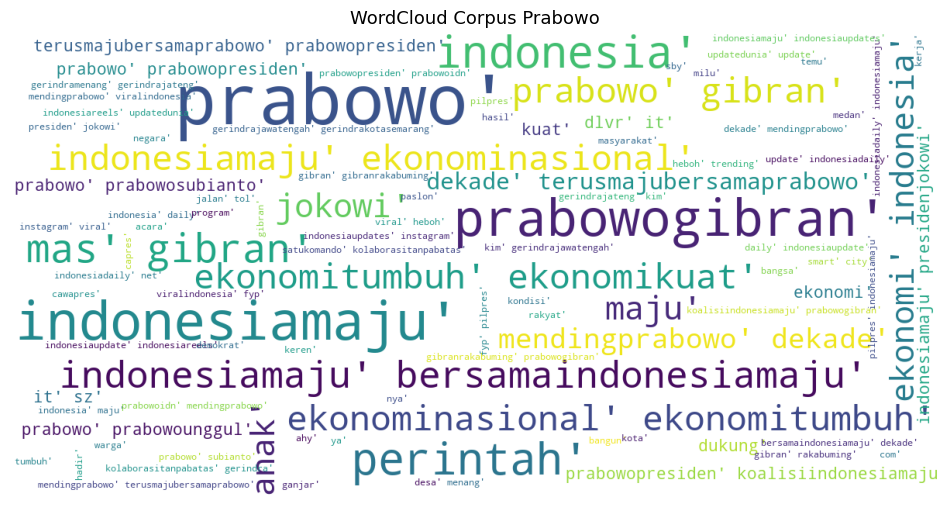

<Figure size 640x480 with 0 Axes>

In [102]:
show_wordcloud(corpus_prabowo,'WordCloud Corpus Prabowo')

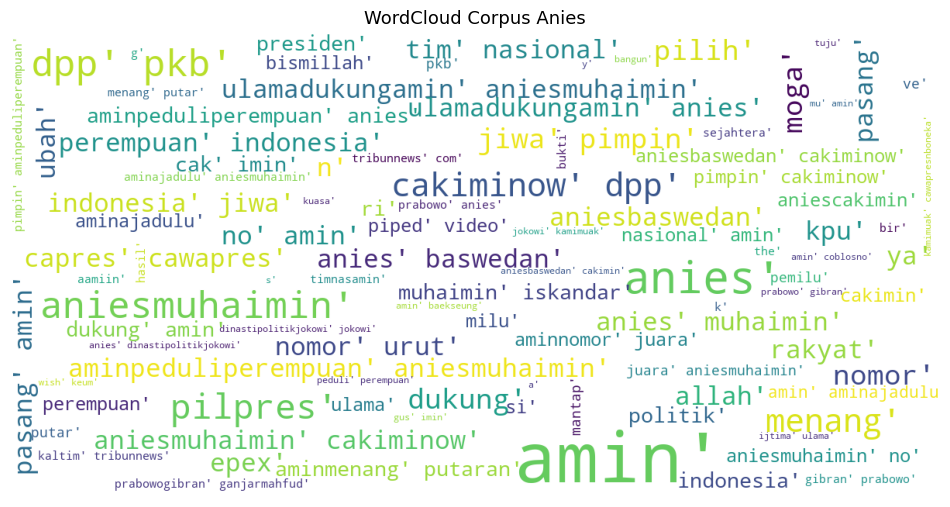

<Figure size 640x480 with 0 Axes>

In [103]:
show_wordcloud(corpus_anies,'WordCloud Corpus Anies')

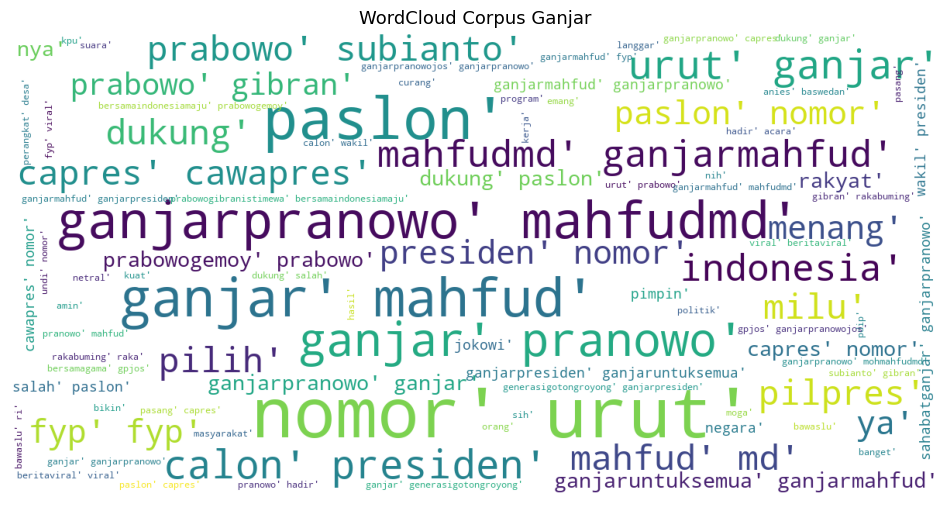

<Figure size 640x480 with 0 Axes>

In [104]:
show_wordcloud(corpus_ganjar,'WordCloud Corpus Ganjar')

## Balanced Sampling

In [105]:
#get sampling data random
# jsampling=25  
# sample=samples.sample(n=jsampling,replace=True,random_state=42)
#get sampling random 50% of data random 
# df = df.sample(n=3,replace=True,frac=0.5,random_state=42)

Text(0.5, 1.0, 'Statistik TextBlob Sentiment 3307')

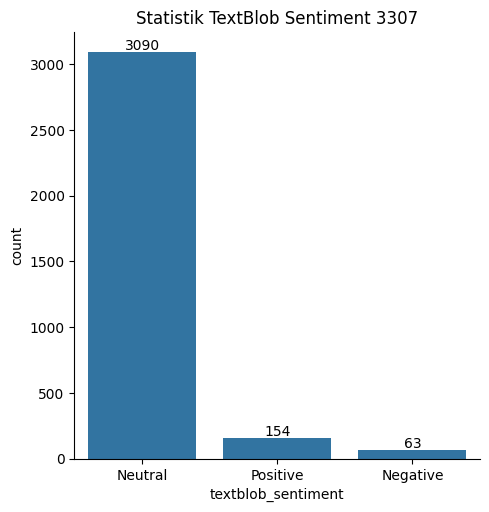

In [106]:
grid = sns.catplot(x='textblob_sentiment', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.title('Statistik TextBlob Sentiment '+str(totaldata))
# plt.savefig('hasil/5.statistik_dataset_textblob_sentiment_'+totaldata+'.png')

In [224]:
# column = 'vader_sentiment'
jsampling=1000
# datax1=samples[['dataset','vader_sentiment','clean_content']]
# balanceddf = samples.groupby(column).sample(n=samples[column].value_counts().min(), random_state=42)
# balanceddf = samples.groupby(['dataset','vader_sentiment']).sample(n=jsampling,replace=True, random_state=42)
balanceddf = samples.groupby(['textblob_sentiment']).sample(n=jsampling,replace=True, random_state=42)

In [225]:
balanceddf.head(10)

,text,clean_content,likes,replies,quotes,retweets,searchQuery,user_location,tanggal,dataset,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
5975,Mahfud MD menilai bahwa temuan Pakta Integrita...,mahfud md nilai temu pakta integritas bupati s...,7,1,0,8,#mahfudmd,NaN,11/15/2023,ganjarmahfud,2023-11-15,Negative,"Sentiment(polarity=-0.4, subjectivity=1.0, ass...",-0.400000,1.000000,-0.2732,0.080,0.920,0.000,Negative
6625,"Tetap Ganjar di hati\nsalut sama pak Ganjar, s...",ganjar hati salut ganjar ganjar ganjar dukung ...,0,0,0,0,#mahfudmd,Kalimantan Tengah,11/14/2023,ganjarmahfud,2023-11-14,Negative,"Sentiment(polarity=-0.1, subjectivity=0.1, ass...",-0.100000,0.100000,0.0000,0.000,1.000,0.000,Neutral
5548,Ini alasan nya : . Jadi kita boikot jangan pil...,alas nya boikot pilih paslon menteri dagang ya...,0,0,0,0,paslon,ï¿½T,11/20/2023,ganjarmahfud,2023-11-20,Negative,"Sentiment(polarity=-0.4000000000000001, subjec...",-0.400000,1.000000,-0.6486,0.283,0.717,0.000,Negative
4605,Semoga tetap waspada #amin @aniesbaswedan @cak...,moga waspada amin aniesbaswedan cakiminow om s...,0,0,0,0,#AMIN,NaN,11/19/2023,aniesmuhaimin,2023-11-19,Negative,"Sentiment(polarity=-0.07500000000000001, subje...",-0.075000,0.050000,-0.0772,0.176,0.672,0.151,Negative
6135,Halo MinJoss\n\nINI ALASAN KITA HARUS MEMILIH ...,halo minjoss alas pilih ganjar presiden ayo sa...,0,1,0,0,#mahfudmd,NaN,11/16/2023,ganjarmahfud,2023-11-16,Negative,"Sentiment(polarity=-0.4, subjectivity=1.0, ass...",-0.400000,1.000000,-0.2732,0.095,0.905,0.000,Negative
2384,"Mental pejabat ngemis uang rakyat ini, patut d...",mental jabat ngemis uang rakyat ini patut jdka...,6,6,0,6,#AMIN,NaN,11/20/2023,aniesmuhaimin,2023-11-20,Negative,"Sentiment(polarity=-0.1, subjectivity=0.2, ass...",-0.100000,0.200000,0.0000,0.000,1.000,0.000,Neutral
7128,Capres nomor urut 2 Prabowo Subianto mengungka...,capres nomor urut prabowo subianto alas joget ...,13,26,4,3,nomor urut,Jakarta,11/19/2023,ganjarmahfud,2023-11-19,Negative,"Sentiment(polarity=-0.4, subjectivity=1.0, ass...",-0.400000,1.000000,-0.2732,0.139,0.861,0.000,Negative
4998,"Pressure pushing down on Hasto, pressing down ...",pressure pushing down on hasto pressing down o...,1,2,0,0,#ganjarmahfud,"Jakarta, Indonesia",11/20/2023,ganjarmahfud,2023-11-20,Negative,"Sentiment(polarity=-0.15555555555555559, subje...",-0.155556,0.288889,-0.2960,0.109,0.891,0.000,Negative
5975,Mahfud MD menilai bahwa temuan Pakta Integrita...,mahfud md nilai temu pakta integritas bupati s...,7,1,0,8,#mahfudmd,NaN,11/15/2023,ganjarmahfud,2023-11-15,Negative,"Sentiment(polarity=-0.4, subjectivity=1.0, ass...",-0.400000,1.000000,-0.2732,0.080,0.920,0.000,Negative
7017,"Lu boleh pilih paslon 1, 2, dan 3. Terserah. A...",kamu pilih paslon serah alas logis pilih kamu ...,14,3,0,1,paslon,NaN,11/20/2023,ganjarmahfud,2023-11-20,Negative,"Sentiment(polarity=-0.4, subjectivity=1.0, ass...",-0.400000,1.000000,-0.2732,0.075,0.925,0.000,Negative


In [226]:
# balanced_df=samples.groupby('vader_sentiment',as_index = False,group_keys=False).apply(lambda s: s.sample(3,replace=True))

In [227]:
# balanceddf.head(10)

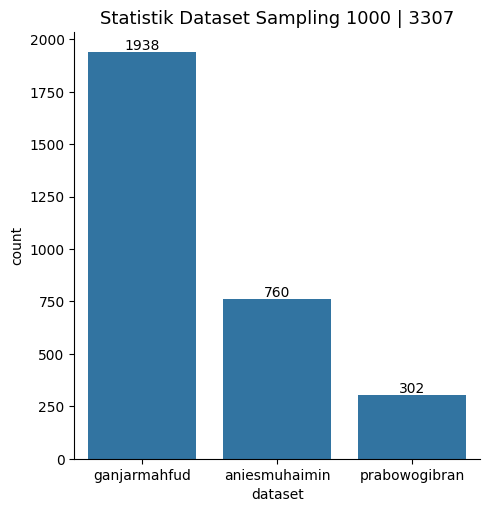

In [228]:
balanced=sns.catplot(data=balanceddf, x="dataset", kind="count")#,hue="vader_sentiment",palette="pastel")
axx = balanced.axes[0, 0]
axx.bar_label(axx.containers[0])
plt.title('Statistik Dataset Sampling '+str(jsampling)+' | '+str(totaldata),fontsize=13)
plt.savefig('hasil/5.statistik_dataset_sampling_'+str(jsampling)+'_balanced.png')

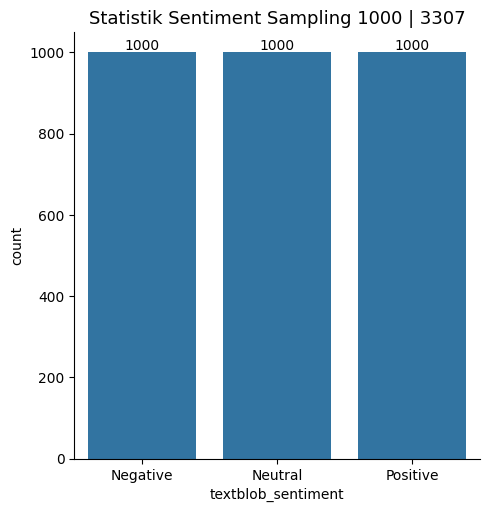

In [229]:
balanced1=sns.catplot(data=balanceddf, x="textblob_sentiment", kind="count")#,hue="textblob_sentiment",palette="pastel")
axx = balanced1.axes[0, 0]
axx.bar_label(axx.containers[0])
plt.title('Statistik Sentiment Sampling '+str(jsampling)+' | '+str(totaldata),fontsize=13)
plt.savefig('hasil/5.statistik_dataset_sampling_textblobsentiment_'+str(jsampling)+'_sentiment_imbalanced.png')

In [230]:
jdataset=str(balanceddf['dataset'].value_counts().reindex(['prabowogibran','aniesmuhaimin','ganjarmahfud'], fill_value=0))
jsentiment=str(balanceddf['textblob_sentiment'].value_counts().reindex(['Positive','Neutral','Negative'], fill_value=0))
with open('hasil/5.stats-dataset-sentiment_samples_'+str(((jsampling)))+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(jdataset))
    f.writelines(''.join('\n'))
    f.writelines(''.join(jsentiment))
# print(jdataset,jsentiment)

In [231]:
import numpy as np
# Code Snippet for Character Length Histogram
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

# Code Snippet for Word Length Histogram
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

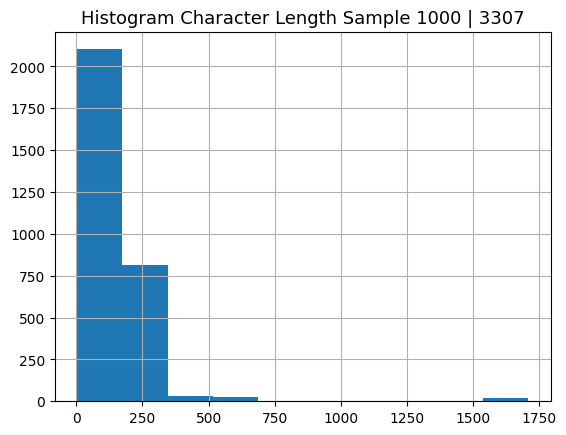

In [232]:
# plot_character_length_histogram(sample['clean_content'])
plot_character_length_histogram(balanceddf['clean_content'])
plt.title('Histogram Character Length Sample '+str(jsampling)+' | '+str(totaldata),fontsize=13)
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_character_length_histogram.png')

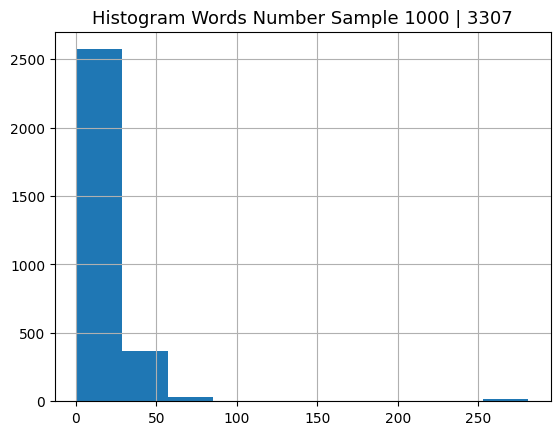

In [233]:
# plot_word_number_histogram(sample['clean_content'])
plot_word_number_histogram(balanceddf['clean_content'])
plt.title('Histogram Words Number Sample '+str(jsampling)+' | '+str(totaldata),fontsize=13)

plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_word_number_histogram.png')

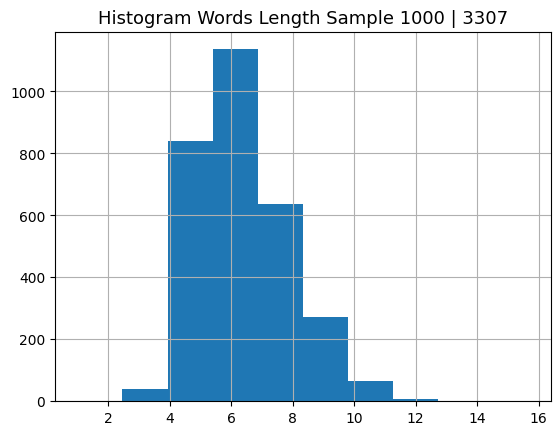

In [234]:
# plot_word_length_histogram(sample['clean_content'])
plot_word_length_histogram(balanceddf['clean_content'])
plt.title('Histogram Words Length Sample '+str(jsampling)+' | '+str(totaldata),fontsize=13)
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_word_length_histogram.png')

## Split Dataset

In [235]:
# sample.head()

In [236]:
# dataset=sample
dataset=balanceddf
X = dataset['clean_content']     # Define feature matriX
y = dataset['textblob_sentiment']         # Define target feature matriX
target_label=['Positive','Neutral','Negative']
jumlahdatauji=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jumlahdatauji, random_state=42, stratify=y)

datalatih=('Dataset shopee {}:{} \n [INFO] Sebaran kelas pada training  set: \n Negative: \t {} \n Neutral: \t{} \n Positive:\t{} \n'.format((1-jumlahdatauji)*100,jumlahdatauji*100,sum(y_train=='Negative'), sum(y_train=='Neutral'), sum(y_train=='Positive')))
datauji=('[INFO] Sebaran kelas pada testing set:\n Negative: \t{}\n Neutral: \t{}\n Positive:\t{} \n'.format(sum(y_test=='Negative'), sum(y_test=='Neutral'), sum(y_test=='Positive')))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/datauji-pilpres2024_sample_'+str(jsampling)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

print(datalatih, datauji, dimensi_data)
dtuji=int(jumlahdatauji*100)
dtlatih=(100-(dtuji))

Dataset shopee 75.0:25.0 
 [INFO] Sebaran kelas pada training  set: 
 Negative: 	 750 
 Neutral: 	750 
 Positive:	750 
 [INFO] Sebaran kelas pada testing set:
 Negative: 	250
 Neutral: 	250
 Positive:	250 
 [INFO] Shape Data: 
 X_train: 	 (2250,) 
 X_test: 	 (750,) 
 y_train: 	 (2250,) 
 y_test: 	 (750,) 



## Save Splitted Dataset

In [237]:
# print(dataset)

In [238]:
# dataset.to_csv( "hasil/5_dataset__"+d+".csv", index=False, encoding='utf-8-sig')
X_train.to_csv( "hasil/5_train_data_"+str(jsampling)+"_"+str(dtlatih)+"_"+d+".csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/5_test_data_"+str(jsampling)+"_"+str(dtuji)+"_"+d+".csv", index=False, encoding='utf-8-sig')

# Term Weighting TFIDF X Training and Y Testing

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

In [240]:
# ngram_range = (1,2) #bigram
ngram_range = (1,3) #trigram

min_df = 5

tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)
# tfidf = TfidfVectorizer(max_features=1000)
# vectors = tfidf.fit_transform(dataset.clean_content).toarray()
# vectors = tfidf.fit_transform(X_train).toarray()
# words_df = pd.DataFrame(vectors, columns=tfidf.get_feature_names_out())
# words_df.head(10)


In [241]:

X_train = tfidf.fit_transform(X_train).toarray()
print(X_train)
columns=tfidf.get_feature_names_out()
# print(columns)
x_train_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())
x_train_df.head(10)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,aamiin,abang,abang cari,abang cari muka,abdi,abdi bangun,abdi bangun negeri,about,about apa,about apa kamu,...,zaman politikus,zaman politikus yang,zionist,zionist israhell,zionist israhell putar,zjtxuvjlhpi,zsn,zsn fawga,zsn fawga epex,zvn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089499,0.089499,0.089499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
n_samples, n_features = X_train.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 2250
Number of features: 7228


In [243]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [244]:
x_train_df.to_csv( "hasil/xtrain_tfidf_trigram_"+str(jsampling)+"_"+str(dtlatih)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

## TFIDF YTEST

In [245]:
X_test = tfidf.transform(X_test).toarray()
print(X_test)
columnstest=tfidf.get_feature_names_out()
# print(columnstest)
x_test_df = pd.DataFrame(X_test, columns=tfidf.get_feature_names_out())
x_test_df.head(10)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,aamiin,abang,abang cari,abang cari muka,abdi,abdi bangun,abdi bangun negeri,about,about apa,about apa kamu,...,zaman politikus,zaman politikus yang,zionist,zionist israhell,zionist israhell putar,zjtxuvjlhpi,zsn,zsn fawga,zsn fawga epex,zvn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
x_test_df.to_csv( "hasil/xtest_tfidf_trigram_"+str(jsampling)+"_"+str(dtuji)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

In [247]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0, 1))
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [248]:
print(X_train)
X_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(2250, 7228)

## Training and Testing

In [249]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Models

In [250]:
C=1
# Create and train a random forest classifier
# forest = RandomForestClassifier()
# best recommeded 'gamma': 100.0, 'C': 0.01
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC Sigmoid', SVC(kernel='sigmoid',C=C)),
           ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          # ('Naive Bayes', MultinomialNB()),
          # ('Decision Tree', DecisionTreeClassifier()),
          # ('Random Forest',RandomForestClassifier(n_estimators=50)),
          # ('Regresi Linier',LogisticRegression()),
        ]


In [251]:
for name, clf in models:
  clf.fit(X_train, y_train) #x_train merupakan fitur, y train merupakan label
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/training_result_pilpres_sample_'+str(jsampling)+'_'+str(dtlatih)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Training Menggunakan SVC Sigmoid, akurasi pada training set: 0.9546666666666667 

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 1.0 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 1.0 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9106666666666666 



## Pipeline And Gridsearch CV

In [252]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


In [253]:
pipe = Pipeline([
    ('bag_of_words', TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)),
    ('estimator', SVC(random_state=42))])

#create GridSearchCV object with set of possible parameters
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10,100]
kernel = ['linear','rbf','poly','sigmoid']
# kernel = ['rbf']
param_grid={
    'estimator__C': Cs,
    'estimator__gamma': gammas,
    'estimator__kernel': kernel
}

In [254]:
# %%time
# # scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}
# # scoring=['accuracy','recall_macro','precision_macro','f1_macro']
# grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)

# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

## Testing 

In [255]:
for name, clf in models:
  # clf_predict = 
  clf.predict(X_test) #x_test merupakan fitur, y_test merupakan label
  test_acc = accuracy_score(y_test, clf.predict(X_test)) #clf.predict adalah prediksi label dari fitur x_test
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  # printed=('[INFO] testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, train_acc))
  with open('hasil/testing_result_pilpres_sample_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Testing Menggunakan SVC Sigmoid, akurasi pada testing set: 0.9013333333333333 

[INFO] Testing Menggunakan SVC linear kernel, akurasi pada testing set: 0.9866666666666667 

[INFO] Testing Menggunakan SVC RBF kernel, akurasi pada testing set: 0.9933333333333333 

[INFO] Testing Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.8626666666666667 



## Cross Validation

In [256]:
""" # cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# k=[3,5,7,10,12,15]
k=[5,7,12]
for x in (k):
  for name, model in models:
    clf.fit(X_train, y_train)
    cv = KFold(n_splits=x, random_state=50, shuffle=True)
    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    printed_dataset=('Dataset: {} \t'.format('mlbb'))
    printed=('[INFO] {}x Cross Validation Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f}) \n'.format(x,name, cross_val_acc.mean(), cross_val_acc.std() * 2))
    with open('hasil/training_result_pilpres2024_crossval_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
      f.writelines(''.join(printed_dataset))
      f.writelines(''.join(printed))
    
    print(printed)
    # f.writelines(''.join("\n")) """

' # cross-validation\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n# k=[3,5,7,10,12,15]\nk=[5,7,12]\nfor x in (k):\n  for name, model in models:\n    clf.fit(X_train, y_train)\n    cv = KFold(n_splits=x, random_state=50, shuffle=True)\n    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring=\'accuracy\')\n    printed_dataset=(\'Dataset: {} \t\'.format(\'mlbb\'))\n    printed=(\'[INFO] {}x Cross Validation Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f}) \n\'.format(x,name, cross_val_acc.mean(), cross_val_acc.std() * 2))\n    with open(\'hasil/training_result_pilpres2024_crossval_\'+str(jsampling)+\'_\'+str(dtuji)+\'_\'+str(d)+\'.txt\', \'a\', encoding=\'utf-8\') as f:\n      f.writelines(\'\'.join(printed_dataset))\n      f.writelines(\'\'.join(printed))\n    \n    print(printed)\n    # f.writelines(\'\'.join("\n")) '

## Confusion Matrix

In [257]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score,roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
# from sklearn.metrics import plot_confusion_matrix


In [258]:

# for name, model in models:
#   predictions=model.predict(X_test)
#   cm = confusion_matrix(y_test, predictions, labels=model.classes_)
#   # plot_confusion_matrix(model,X_train, y_train) 
#   disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
#   disp.plot()
#   # plt.title('Confusion Matrix: {}'.format(name))
#   plt.show()

In [259]:
def showauc(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a Pulsar Star classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

## Laporan Klasifikasi


[INFO] Laporan klasifikasi



Menggunakan Metode :SVC Sigmoid 

              precision    recall  f1-score   support

    Negative       0.99      1.00      0.99       250
     Neutral       0.79      0.96      0.87       250
    Positive       0.96      0.75      0.84       250

    accuracy                           0.90       750
   macro avg       0.91      0.90      0.90       750
weighted avg       0.91      0.90      0.90       750

Accuracy score: 90.13%
Precision score: 91.28%
Recall score: 90.13% 

Menggunakan Metode :SVC linear kernel 

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       250
     Neutral       0.98      0.98      0.98       250
    Positive       0.98      0.98      0.98       250

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750

Accuracy score: 98.67%
Precision score: 98.67%
Recall score: 98.67% 

Menggunakan Metode :SVC 

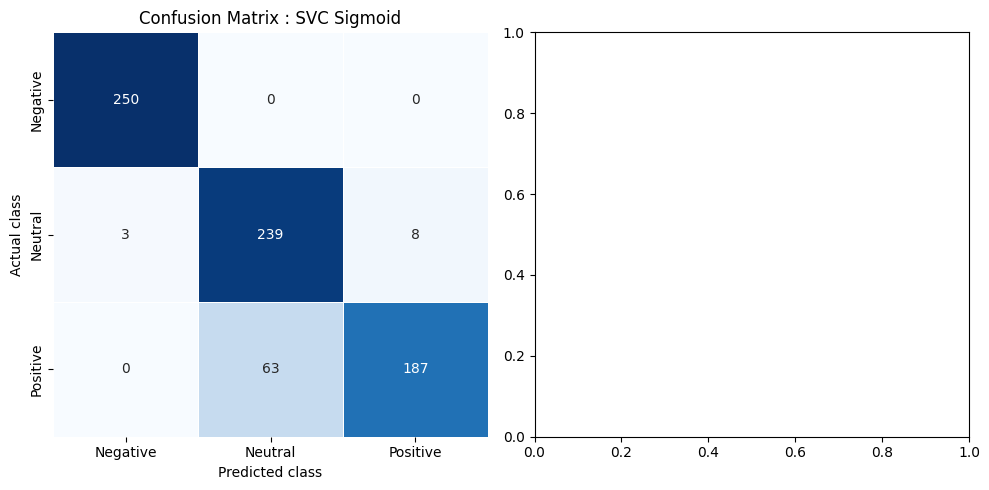

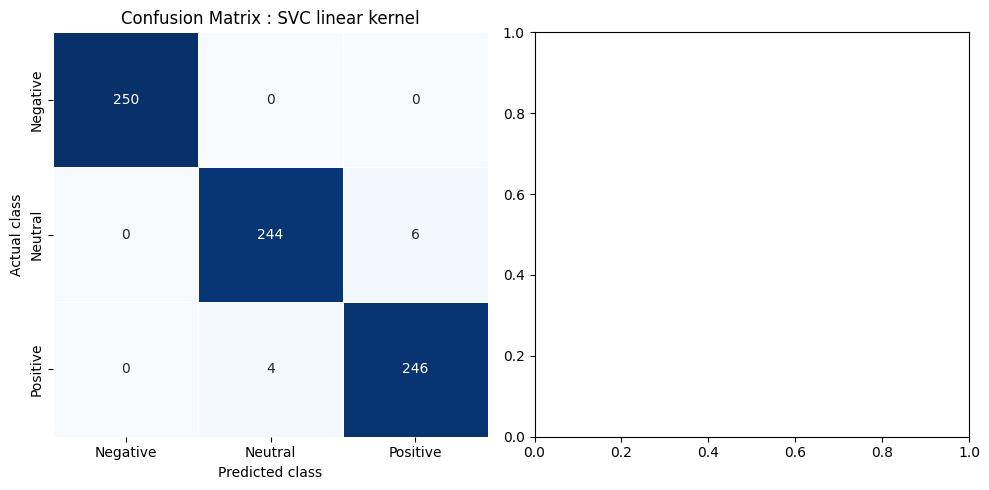

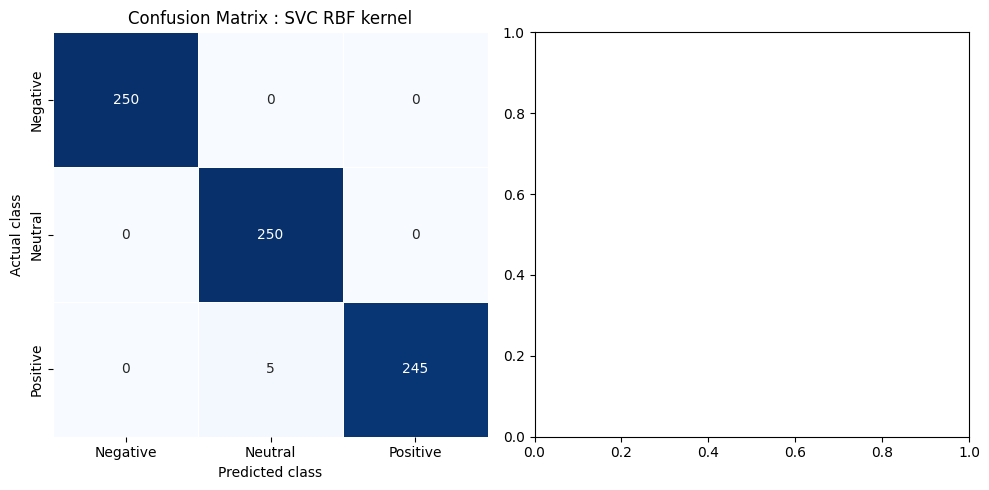

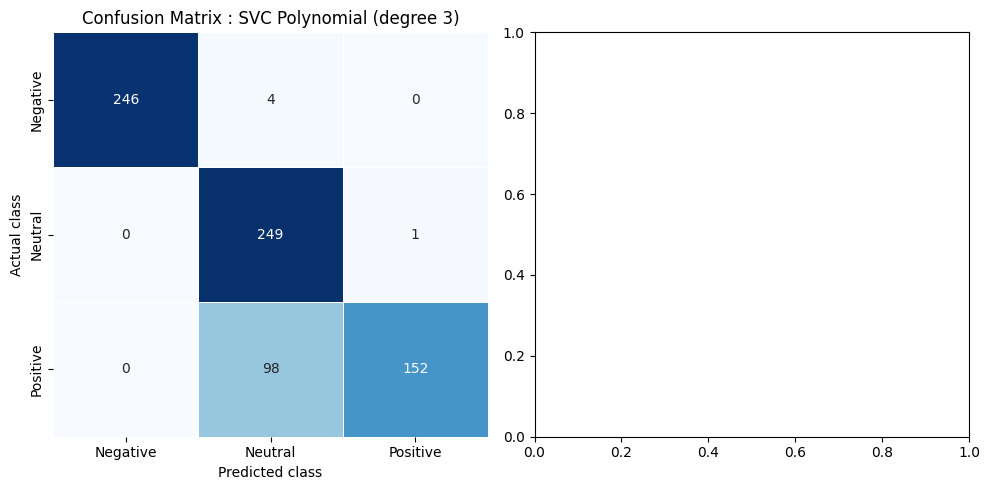

In [260]:
print("[INFO] Laporan klasifikasi\n")
target_names=['Negative', 'Neutral','Positive']
for name, clf in models:
  clf_predict = clf.predict(X_test) #y_pred
  printed_titles=('Menggunakan Metode :{} \n'.format(name))
  printed=(classification_report(y_test, clf_predict, target_names=['Negative', 'Neutral','Positive']))
  akurasi=('Accuracy score: %.2f%%' %(accuracy_score(y_test, clf_predict)*100))  
  presisi=('Precision score: %.2f%%' % (precision_score(y_test, clf_predict, average= 'weighted')*100))
  recall=('Recall score: %.2f%% \n' % (recall_score(y_test, clf_predict, average= 'weighted')*100))
  
  with open('hasil/classification_report_pilpres2024_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
      # f.writelines(''.join(name))
      f.writelines(''.join(printed_titles))
      f.writelines(''.join(printed))
      f.writelines(' \n')
      f.writelines(''.join(akurasi+'\n'+presisi+'\n'+recall))

      f.writelines(' \n')
  print(printed_titles+'\n'+printed)
  print(akurasi+'\n'+presisi+'\n'+recall)
  # Confusion Matrix Plot
  fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
  cm = confusion_matrix(y_test, clf_predict, labels=['Negative', 'Neutral','Positive'])
  sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
  ax1.set_title("Confusion Matrix : {}".format(name))
  ax1.set_xlabel("Predicted class")
  ax1.set_ylabel("Actual class")
  ax1.set_xticklabels(target_names)
  ax1.set_yticklabels(target_names)
  # showauc(y_test,clf_predict)

  # fpr, tpr, thresholds = roc_curve(y_test,clf_predict)
  # # plt.figure(figsize=(6,4))
  # plt.plot(fpr, tpr, linewidth=2)
  # plt.plot([0,1], [0,1], 'k--' )
  # plt.rcParams['font.size'] = 12
  # ax2.set_title('ROC curve for Predicting a Pulsar Star classifier')
  # ax2.set_xlabel('False Positive Rate (1 - Specificity)')
  # ax2.set_ylabel('True Positive Rate (Sensitivity)')
  # plt.show()


  fig.tight_layout()
  plt.savefig('hasil/5.confusion_matrix_'+str(jsampling)+'_{}.png'.format(name))


## ROC/AUC


In [261]:
def showauc(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a Pulsar Star classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

### Compute ROC AUC



In [262]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

NameError: name 'y_pred_test' is not defined

## Parameter Optimization RandomizedSearchCV / GridSearchCV

In [ ]:
cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
# Randomized grid search
n_iter_search = 10
param_grid = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}
gs = RandomizedSearchCV(clf, param_distributions = param_grid, n_iter = n_iter_search, cv = cv, scoring= 'accuracy')
# gs = GridSearchCV(clf, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)
# -----------------------------------------------------
# Train model
gs.fit(X_train, y_train)  
best=("The best parameters are %s" % (gs.best_params_)) 
# Predict on test set
y_pred = gs.best_estimator_.predict(X_test)

#Setup GridSearchCV
# grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)
# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

# Get Probability estimates
# y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
# -----------------------------------------------------
akurasi=('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
presisi=('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
recall=('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))
with open('hasil/parameter_optimization_report_pilpres2024_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    # f.writelines(''.join(name))
    f.writelines(''.join('Parameter Optimization'))
    f.writelines(''.join(best))
    f.writelines(' \n')
    f.writelines(''.join(y_pred))
    f.writelines(' \n')
    f.writelines(''.join(akurasi+'\n'+presisi+'\n'+recall))
    f.writelines(' \n')

print(best+'\n'+y_pred+'\n'+akurasi+'\n'+presisi+'\n'+recall)

["The best parameters are {'gamma': 1.0, 'C': 10.0}\nNegative\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 ...
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"
 "The best parameters are {'gamma': 1.0, 'C': 10.0}\nNeutral\nAccuracy score: 95.91%\nPrecision score: 95.94%\nRecall score: 95.91%"]


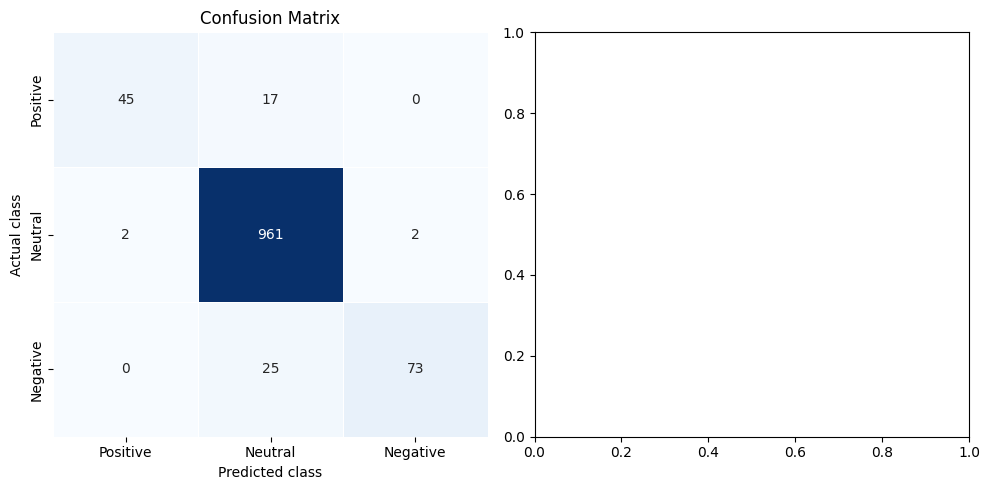

In [ ]:
target_label=['Positive','Neutral','Negative']
# Plot confusion matrix
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)#, labels= target_label)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
ax1.set_xticklabels(target_label)
ax1.set_yticklabels(target_label)
fig.tight_layout()
plt.savefig('hasil/5.confusion_matrix_optimization_parameter'+str(jsampling)+'_.png')


## AUROC dan AUC